<a href="https://www.kaggle.com/code/patrickreiners/the-biggest-loser?scriptVersionId=101351758" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#my first own sports analytics project in general and kaggle!

import pandas as pd 
import pandasql as ps

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/superbowl-history-1967-2020/superbowl.csv


In [2]:
df = pd.read_csv(os.path.join(dirname,filename))
print(df.head())
print(df.shape)

superbowl = df[['Winner','Loser']]


         Date         SB                Winner  Winner Pts  \
0  Feb 2 2020   LIV (54)    Kansas City Chiefs          31   
1  Feb 3 2019  LIII (53)  New England Patriots          13   
2  Feb 4 2018   LII (52)   Philadelphia Eagles          41   
3  Feb 5 2017    LI (51)  New England Patriots          34   
4  Feb 7 2016         50        Denver Broncos          24   

                  Loser  Loser Pts              MVP                Stadium  \
0   San Francisco 49ers         20  Patrick Mahomes      Hard Rock Stadium   
1      Los Angeles Rams          3   Julian Edelman  Mercedes-Benz Stadium   
2  New England Patriots         33       Nick Foles      U.S. Bank Stadium   
3       Atlanta Falcons         28        Tom Brady            NRG Stadium   
4     Carolina Panthers         10       Von Miller         Levi's Stadium   

            City       State  
0  Miami Gardens     Florida  
1        Atlanta     Georgia  
2    Minneapolis   Minnesota  
3        Houston       Texas  
4  

In [3]:
#Teams with most lost in total but not general loser (Patriots won 6 times...)
superbowl['Loser'].groupby(superbowl['Loser']).count().sort_values(ascending=False).head(10)

Loser
Denver Broncos          5
New England Patriots    5
Buffalo Bills           4
Minnesota Vikings       4
Miami Dolphins          3
Dallas Cowboys          3
Atlanta Falcons         2
Seattle Seahawks        2
San Francisco 49ers     2
Pittsburgh Steelers     2
Name: Loser, dtype: int64

In [4]:
#SQL-Query to check which team never won a final.
sql_q1 = '''
    SELECT  Winner, Loser, COUNT(Loser) AS Count
    FROM superbowl
    WHERE Loser NOT IN
        (SELECT Winner 
         FROM superbowl)
    GROUP BY Loser
    ORDER BY Count DESC
'''
superbowl = (ps.sqldf(sql_q1, locals()))
superbowl[['Loser','Count']]

,Loser,Count
0,Minnesota Vikings,4
1,Buffalo Bills,4
2,Los Angeles Rams,2
3,Cincinnati Bengals,2
4,Carolina Panthers,2
5,Atlanta Falcons,2
6,Tennessee Titans,1
7,San Diego Chargers,1
8,Arizona Cardinals,1


Rams should not be in the list because they won as St.Louis Rams. So i needed to remove the cities from the Winner/loser Column. I belive in "Once a Raider, always a Raider" and applied this rule to all teams.

In [5]:
#remove City from Teamname to make sure that also teams after a move get calculated (For e.g. Rams or Raiders)

superbowl['Winner'] = [x.split(' ')[-1] for x in superbowl['Winner']]
superbowl['Loser'] = [x.split(' ')[-1] for x in superbowl['Loser']]
superbowl.head()

,Winner,Loser,Count
0,Raiders,Vikings,4
1,Cowboys,Bills,4
2,Patriots,Rams,2
3,49ers,Bengals,2
4,Broncos,Panthers,2


These are the biggest Loser in Super Bowl History.They never ever won the final but lost x times!


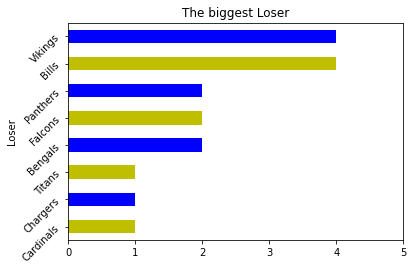

In [6]:
#Query Teams that only lost and never won also after a move to another City.
sql_q2 = '''
    SELECT Loser, Count
    FROM superbowl
    WHERE Loser NOT IN
        (SELECT Winner 
         FROM superbowl)
    GROUP BY Loser
    ORDER BY Count ASC
'''
df2 = (ps.sqldf(sql_q2, locals()))

#Plot the result
df2.plot(kind='barh', x='Loser',  y='Count',xlim=(0,5), color=['y','b'], legend=False, rot=45, title='The biggest Loser')
print('These are the biggest Loser in Super Bowl History.They never ever won the final but lost x times!')